In [101]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install re
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install nltk
!{sys.executable} -m pip install scikit-learn


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Could not find a version that satisfies the requirement re (from versions: )
No matching distribution found for re
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is avail

In [110]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import string
import json
import re
from gensim import corpora
from pprint import pprint
import gensim
from gensim.models import Phrases
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [84]:
FILE = "AllText.json"
FileJson = json.load(open(FILE))
for i, sentenceid in enumerate(FileJson):
    gensim.utils.simple_preprocess(FileJson[sentenceid])
    if not i%500:
        print(i, "done")

0 done
500 done
1000 done
1500 done
2000 done
2500 done
3000 done
3500 done
4000 done
4500 done
5000 done
5500 done
6000 done
6500 done
7000 done
7500 done
8000 done
8500 done
9000 done
9500 done
10000 done
10500 done
11000 done
11500 done
12000 done
12500 done
13000 done
13500 done
14000 done
14500 done
15000 done
15500 done
16000 done
16500 done
17000 done
17500 done
18000 done
18500 done
19000 done
19500 done
20000 done
20500 done
21000 done
21500 done
22000 done
22500 done
23000 done
23500 done
24000 done
24500 done
25000 done
25500 done
26000 done
26500 done
27000 done
27500 done
28000 done
28500 done
29000 done
29500 done
30000 done
30500 done
31000 done
31500 done
32000 done
32500 done
33000 done
33500 done
34000 done
34500 done
35000 done
35500 done
36000 done
36500 done
37000 done
37500 done
38000 done
38500 done
39000 done
39500 done
40000 done
40500 done
41000 done
41500 done
42000 done
42500 done
43000 done
43500 done
44000 done
44500 done
45000 done
45500 done
46000 done
4

353000 done
353500 done
354000 done
354500 done
355000 done
355500 done
356000 done
356500 done
357000 done
357500 done
358000 done
358500 done
359000 done
359500 done
360000 done
360500 done
361000 done
361500 done
362000 done
362500 done
363000 done
363500 done
364000 done
364500 done
365000 done
365500 done
366000 done
366500 done
367000 done
367500 done
368000 done
368500 done
369000 done
369500 done
370000 done
370500 done
371000 done
371500 done
372000 done
372500 done
373000 done
373500 done
374000 done
374500 done
375000 done
375500 done
376000 done
376500 done
377000 done
377500 done
378000 done
378500 done
379000 done
379500 done
380000 done
380500 done
381000 done
381500 done
382000 done
382500 done
383000 done
383500 done
384000 done
384500 done
385000 done
385500 done
386000 done
386500 done
387000 done
387500 done
388000 done
388500 done
389000 done
389500 done
390000 done
390500 done
391000 done
391500 done
392000 done
392500 done
393000 done
393500 done
394000 done
3945

In [116]:
print(len(RawSentences))
model = Word2Vec(sentences=RawSentences, min_count=20, window=5, workers=10, size=300, compute_loss=True)
model.train(RawSentences, total_examples=len(RawSentences), epochs=20)
print(len(model.wv.vocab))

448016
19877


In [117]:
print(model.most_similar('trump', topn=10))

[('trumps', 0.4595962166786194), ('obama', 0.3926130533218384), ('him', 0.3641001582145691), ('duterte', 0.32667648792266846), ('vladimir', 0.30858278274536133), ('his', 0.30499187111854553), ('wcw', 0.3022667467594147), ('npqizn', 0.2926476001739502), ('erdogan', 0.29233822226524353), ('dictator', 0.2920840084552765)]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [134]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word, topn=30)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.figure(figsize=(10, 6), dpi=800)
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


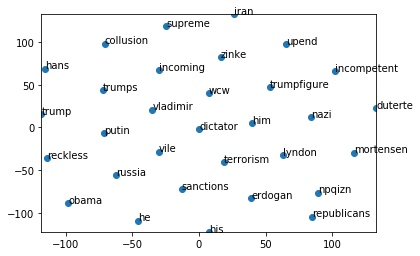

<Figure size 8000x4800 with 0 Axes>

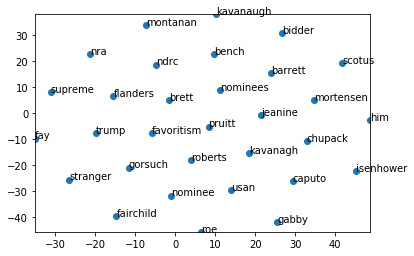

<Figure size 8000x4800 with 0 Axes>

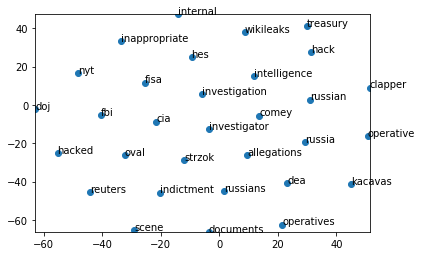

<Figure size 8000x4800 with 0 Axes>

In [142]:
#print(model['trump'])
display_closestwords_tsnescatterplot(model, 'trump')
#print(model.similar_by_word('trump', topn=30))
display_closestwords_tsnescatterplot(model, 'kavanaugh')
#model.similar_by_word('court', topn=30)
display_closestwords_tsnescatterplot(model, 'fbi')
#model.similar_by_word('fbi', topn=30)